# Project #1 - Bobby Buyalos

This was nice work overall. I’ve left a bunch of comments and places
where I’d like to see more explanation or more testing; I hope you’ll
take the opportunity to revise and resubmit!

## *Markov Chains:*

Consider our system ($n = 1, 2, \ldots$): $$\begin{align*}
    &a_n = .5a_{n-1} + .2b_{n-1} + .3c_{n-1} \\
    &b_n = .2a_{n-1} + .6b_{n-1} + .1c_{n-1} \\
    &c_n = .3a_{n-1} + .2b_{n-1} + .6c_{n-1}
\end{align*}
$$

What do these variables represent? (I know from reading the project
prompt, but it would be good to include this information in the text as
well.)

This forms the transition matrix:

$$
\begin{pmatrix}
    .5 & .2 & .3 \\
    .2 & .6 & .1 \\
    .3 & .2 & .6
\end{pmatrix}
$$

Lets see what the market shares will be for the next three years:

In [2]:
import sympy as sym

P = sym.Matrix([[.5, .2 , .3 ],
    [.2 , .6 , .1],
    [.3 , .2 , .6]])

x = sym.Matrix([[1/3], [1/3], [1/3]])

for i in range(4):
    print(f"\n Year {i}:")
    print((P**i)*x)


 Year 0:
Matrix([[0.333333333333333], [0.333333333333333], [0.333333333333333]])

 Year 1:
Matrix([[0.333333333333333], [0.300000000000000], [0.366666666666667]])

 Year 2:
Matrix([[0.336666666666667], [0.283333333333333], [0.380000000000000]])

 Year 3:
Matrix([[0.339000000000000], [0.275333333333333], [0.385666666666667]])

Campaign #1 has the following transition matrix:

$$
\begin{pmatrix}
    .5 & .32 & .3 \\
    .2 & .48 & .1 \\
    .3 & .2 & .6
\end{pmatrix}
$$

Campaign #2 has the following transition matrix:

$$
\begin{pmatrix}
    .5 & .2 & .42 \\
    .2 & .6 & .1 \\
    .3 & .2 & .48
\end{pmatrix}
$$

In [3]:
import random
C1 = sym.Matrix([[.5, .32 , .3 ],
    [.2 , .48 , .1],
    [.3 , .2 , .6]])

C2 = sym.Matrix([[.5, .2 , .42 ],
    [.2 , .6 , .1],
    [.3 , .2 , .48]])

def generate_input_vector():
    random1 = random.randint(1, 999)
    random2 = random.randint(1, (1000 - random1))
    random3 = 1000 - random1 - random2
    return sym.Matrix([[random1/1000], [random2/1000], [random3/1000]])

def ten_year_forcast(T, x):
    return (T**10)*x


def test_system():
    P_score = 0
    C1_score = 0
    C2_score = 0
    for i in range(2000):
        x = generate_input_vector()
        P_value = ten_year_forcast(P, x)[0]
        C1_value = ten_year_forcast(C1, x)[0]
        C2_value = ten_year_forcast(C2, x)[0]
    
        if P_value >= max(C1_value, C2_value):
            P_score += 1
        if C1_value >= max(P_value, C2_value):
            C1_score += 1
        if C2_value >= max(C1_value, P_value):
            C2_score += 1
    return (f"P: {P_score}", f"C1: {C1_score}", f"C2: {C2_score}")

test_system()

('P: 0', 'C1: 0', 'C2: 2000')

For efficiency, it would be much faster to calculate the matrices to the
10th power once and then use this for each of your 2000 random vectors!
If you do this, you’ll also be able to look at the 10 year matrices and
reach a conclusion about which campaign is best for the long term, even
without having to do the simulation.

There is an issue with the random vectors here – the first element of
the vector ends up being twice as large as the other two, on average.

``` python
x=[]
for i in range(2000):
    x.append(generate_input_vector())
import pylab as plt
```

``` python
import numpy as np
y=np.array(x)
y.shape
np.mean(y, axis=0)
```

    array([[0.499604000000000],
           [0.243510000000000],
           [0.256886000000000]], dtype=object)

I would reccomended going with the second campaign. I ran the following
test to come to this conclusion:

First, I randomly generated 2000 inital vectors. I also set up a
function that runs, for 10 iterations (i.e. 10 year forcast), the markov
chains representing the cases of 1) no ad campaigns 2) the first ad
campaign and 3) the third ad campaign. I ran each randomly generated
inital vector each markov chain and then counted for which case ended
with the highest market share.

For all 2,000 inital vectors, the second ad campaign ended with the
highest market share. Therefore, I strongly reccomended moving forward
with the second ad campaign when considering long-term interests.

Some limitations of this study may be that it only looks at the long
term since it uses a a ten year model. Therefore, if the company is
looking for short term gains (next quarter, the next year, etc), then
these results may not be helpful and a new study should be conducted. In
addition, this model assumes that there is no counter-ad campaign from
another company that may change the transition matrix. In other words,
this study does not anticipate other changing factors in the market that
may change the transition matrix and thus the results.

I liked that you chose to use many random vectors for evaluating the
different campaigns (although see the note about the random vectors
above).

I would like to see a bit more thinking about why you got the results
that you did. Is there something about the transition matrices that
tells you why the second campaign is the best?

Grade: S (satisfactory)

## *Sports Ranking:*

We will first incode the sports data into a graph structure and
adjacency matrix.

Our first naïve measure of rankings is through the win/loss ratio
(calculated below as \# wins - \# losses):

| Team | Ratio |
|------|-------|
| 7    | 4     |
| 5    | 2     |
| 3    | 1     |
| 6    | 0     |
| 1    | -1    |
| 2    | -2    |
| 4    | -4    |

Is this actually a ratio? A bit misleading to use that term!

Then we have our matrix power ranking:

| Team | Power |
|------|-------|
| 5    | 16    |
| 7    | 16    |
| 3    | 10    |
| 6    | 9     |
| 2    | 6     |
| 1    | 5     |
| 4    | 5     |

These methods yield essentially the same rankings with only minor (at
most one place) differences

Can you comment on what about the math gives the difference? Why do
teams 5 and 7 look the same for the second method, but different for the
first?

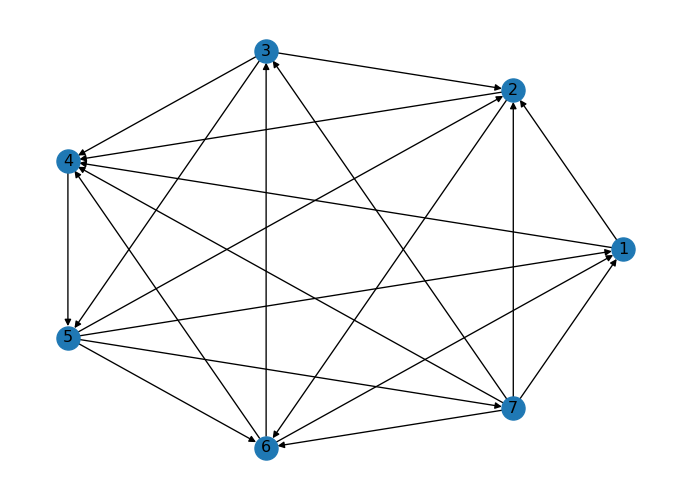

Team 1's rato: -1
Team 2's rato: -2
Team 3's rato: 1
Team 4's rato: -4
Team 5's rato: 2
Team 6's rato: 0
Team 7's rato: 4


Team 1's power: 5
Team 2's power: 6
Team 3's power: 10
Team 4's power: 5
Team 5's power: 16
Team 6's power: 9
Team 7's power: 16

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np

E = [(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (7, 2), (2, 6), (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2), (7, 6), (1, 4), (6, 3)]

M = [4, 8, 7, 3, 7, 23, 15, 6, 18, 13, 14, 7, 13, 7, 18, 45, 10, 19, 14, 13]


G = nx.DiGraph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

# Add vertices
G.add_edges_from(E)

# Draw the graph
nx.draw_circular(G, with_labels=True)
plt.show()


#convert to numpy
adj_matrix = nx.adjacency_matrix(G)
adj_matrix = adj_matrix.toarray()

#form transpose
transpose = adj_matrix.transpose()

#calculate win-loss ratio
for i in range (7):
    print(f"Team {i + 1}'s rato: {sum(adj_matrix[i] - transpose[i])}")

print("\n")

#Calculate powers of all verticies:
power_matrix = adj_matrix + adj_matrix.dot(adj_matrix)
for i in range (7):
    print(f"Team {i + 1}'s power: {sum(power_matrix[i])}")

Now we will do the reverse page rank methodology (rounded to three
decimal places):

| Index | Value |
|-------|-------|
| 5     | 0.250 |
| 7     | 0.185 |
| 3     | 0.166 |
| 6     | 0.131 |
| 4     | 0.128 |
| 2     | 0.080 |
| 1     | 0.060 |

This ranking is very similar to the previous two, the most signifcant
difference is the place of 4, who has risen to 3-rd from worst, whereas
4 was the worst team in the previous two rankings.

In [7]:
#Create Diag. Matrix D
diag_vals = []
for i in range(7):
    total = np.sum(transpose[i])
    if total != 0:
        diag_vals.append(1/total)
    else:
        diag_vals.append(0)
D = np.diag(diag_vals)

#form our transition matrix
transition = adj_matrix.dot(D)

#create function to solve our system
def find_stable(alpha, v, P, Id):
    to_invert = Id - alpha*P
    inverse = to_invert.inv()
    stable = inverse*((1-alpha)*v)
    return stable

I_7 = sym.Matrix([[1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], \
    [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1]])

v = sym.Matrix([[1/7], [1/7], [1/7], [1/7], [1/7], [1/7], [1/7]])

#et voila, we have our reverse page rank
find_stable(0.85, v, transition, I_7)

What is the math behind what’s happening in this code here? What is
reverse page rank, and what exactly is happening in the find_stable
function? How can I, the reader, know that it’s working as it should?

Now we will do the weighted power ranking:

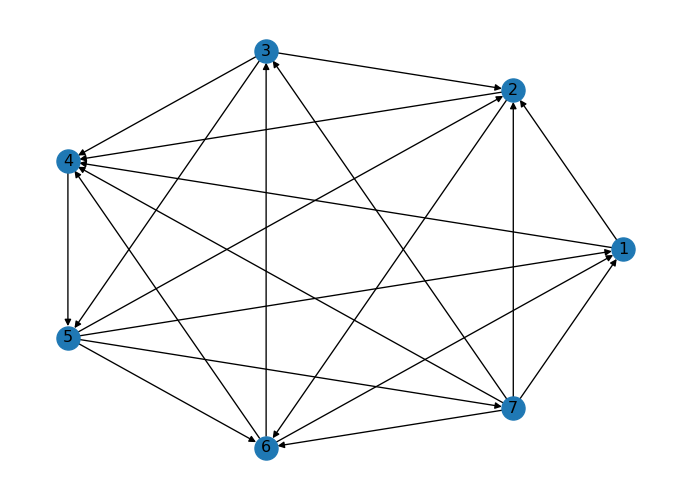

[[ 0  4  0 14  0  0  0]
 [ 0  0  0  7  0 18  0]
 [ 0  7  0 13  7  0  0]
 [ 0  0  0  0  3  0  0]
 [23 10  0  0  0 18  7]
 [15  0 13 13  0  0  0]
 [45  6  8 14  0 19  0]]
Team 1's power: 160
Team 2's power: 784
Team 3's power: 647
Team 4's power: 177
Team 5's power: 2104
Team 6's power: 701
Team 7's power: 2089

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np

E = [(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (7, 2), (2, 6), (3, 4), (7, 4), (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2), (7, 6), (1, 4), (6, 3)]

M = [4, 8, 7, 3, 7, 23, 15, 6, 18, 13, 14, 7, 13, 7, 18, 45, 10, 19, 14, 13]

F = nx.DiGraph()
nodes = range(1, 8)
F.add_nodes_from(nodes)

for i, tuple in enumerate(E):
    a, b = tuple
    F.add_edge(a, b, weight = M[i])

nx.draw_circular(F, with_labels=True)
plt.show()

weighted_adj = nx.adjacency_matrix(F)
weighted_adj = weighted_adj.toarray()
print(weighted_adj)

#power matrix:
power_weighted_matrix = weighted_adj + weighted_adj.dot(weighted_adj)
for i in range (7):
    print(f"Team {i + 1}'s power: {sum(power_weighted_matrix[i])}")


We can see the power ranking of the weighted matrix:

| Team   | Power |
|--------|-------|
| Team 5 | 2104  |
| Team 7 | 2089  |
| Team 2 | 784   |
| Team 6 | 701   |
| Team 3 | 647   |
| Team 4 | 177   |
| Team 1 | 160   |

I would like to see more explanation about what is happening
mathematically in these different cases; what are each of the rankings
measuring, what formulas apply, and why your code matches what these
formulas say. Then, I’d like a discussion of why the different rankings
give different results, and which one you think is the most accurate.

Also: there are a lot of places where you are doing things manually
(like entering the identity matrix by hand) or using loops to do matrix
computations. You’d be better off using numpy or sympy functions to do
these things, as they are much faster and less error-prone (and easier
to write, too!)

Grade: R

## *PLU Factorization*

We will first create the PLU_factorization algo (assuming non-zero diag
entries):

In [9]:
import copy
def PLU_factorization(A):
    """
    PLU factorization algo. Assuming non-zero diag. entires.

    Inputs:
    P [numpy array] - input square matrix

    Outputs tuple[numpy array, numpy array, numpy array] - will reutrn P, L 
    and U matrices in that order
    """
    P = copy.deepcopy(A)
    numrows = len(P)
    numcols = len(P[0])
    index_list = [i for i in range(numrows)]
    multipliers = {}

    for k in range(numcols - 1):
        if int(P[index_list[k]][k]) == 0:
            for i in range(index_list[k], numrows):
                if P[i][k] != 0:
                    i_index = index_list.index(i)
                    k_index = index_list.index(k)
                    index_list[k_index], index_list[i_index] = index_list[i_index], index_list[k_index]
                    break
        #run again in case we dont find a nonzero value
        if int(P[index_list[k]][k]) != 0:
            for i in range(k + 1, numrows):
                m = index_list.index(i)
                multiplier = - P[m][k] / P[index_list[k]][k]
                multipliers[(m, k)] = multiplier
                P[m] = P[m] + multiplier*(P[index_list[k]])
    
    #Create Lower Triangular Matrix
    zero_matrix = np.eye((numrows))
    for tuple in multipliers:
        x, y = tuple
        zero_matrix[index_list[x]][y] = - multipliers[tuple]
    
    #Create Permutation Matrix and Upper Triangular Matrix:
    perm_matrix = []
    U = []
    for i in index_list:
        y = [0]*numrows
        y[i] = 1
        perm_matrix.append(y)
        U.append(list(P[i]))
    return (np.array(perm_matrix), zero_matrix, np.array(U))

To show that these work, we will show the LU factorization problems from
HW3:

In [10]:
#Problem 11:
test1 = np.array([[2, -1, 1], [2, 3, -2], [4, 2, 2]])
P, L, U = PLU_factorization(test1)
print("PROBLEM 11")
print("P:", P)
print("L:", L)
print("U:", U)

print("LU = ", L.dot(U))
print("A = ", test1)

PROBLEM 11
P: [[1 0 0]
 [0 1 0]
 [0 0 1]]
L: [[1. 0. 0.]
 [1. 1. 0.]
 [2. 1. 1.]]
U: [[ 2 -1  1]
 [ 0  4 -3]
 [ 0  0  3]]
LU =  [[ 2. -1.  1.]
 [ 2.  3. -2.]
 [ 4.  2.  2.]]
A =  [[ 2 -1  1]
 [ 2  3 -2]
 [ 4  2  2]]

In [11]:
#problem 12
test2 = np.array([[2, 1, 0], [-4, -1, -1], [2, 3, -3]])
P, L, U = PLU_factorization(test2)
print("PROBLEM 12")
print("P:", P)
print("L:", L)
print("U:", U)
print("LU = ", L.dot(U))
print("A = ", test2)
print("\n")

PROBLEM 12
P: [[1 0 0]
 [0 1 0]
 [0 0 1]]
L: [[ 1.  0.  0.]
 [-2.  1.  0.]
 [ 1.  2.  1.]]
U: [[ 2  1  0]
 [ 0  1 -1]
 [ 0  0 -1]]
LU =  [[ 2.  1.  0.]
 [-4. -1. -1.]
 [ 2.  3. -3.]]
A =  [[ 2  1  0]
 [-4 -1 -1]
 [ 2  3 -3]]



In [12]:
#problem 13
test3 = np.array([[2, 1, 3], [-4, -2, -1], [2, 3, -3]])
P, L, U = PLU_factorization(test3)
print("PROBLEM 13")
print("P:", P)
print("L:", L)
print("U:", U)
print("LU = ", L.dot(U))
print("PA = ", P.dot(test3))
print("\n")

PROBLEM 13
P: [[1 0 0]
 [0 0 1]
 [0 1 0]]
L: [[ 1.  0.  0.]
 [ 1.  1.  0.]
 [-2. -0.  1.]]
U: [[ 2  1  3]
 [ 0  2 -6]
 [ 0  0  5]]
LU =  [[ 2.  1.  3.]
 [ 2.  3. -3.]
 [-4. -2. -1.]]
PA =  [[ 2  1  3]
 [ 2  3 -3]
 [-4 -2 -1]]



Now we will code the PLU solver algo:

In [13]:
def PLU_solver(A, b):
    """
    Given a square matrix A (non-zero diag entries) and a solution b, solve for the unknowns using
    PLU factorization (i.e. solve for x in Ax = b)
    """
    size = len(A)
    P, L, U = PLU_factorization(A)
    #find  Ly = Pb
    Pb = P.dot(b)
    y = [None]*size
    y[0] = [(Pb[0]/L[0][0])[0]]
    for row in range(1, size):
        sum = 0
        for col in range(row):
            sum += (L[row][col])*(y[col][0])
        y[row] = [((Pb[row] - sum) / L[row][row])[0]]
    y = np.array(y)

    #solve Ux = y
    x = [None]*size
    n = size - 1
    x[n] = [(y[n] / U[n][n])[0]]
    row = n - 1
    while row >=0:
        sum = 0
        for col in range(row + 1, size):
            sum += U[row][col]*(x[col][0])
        x[row] = [((y[row] - sum) / U[row][row])[0]]
        row -= 1
    x = np.array(x)
    return x

Now we will test this solver:

In [14]:
#PLU solver test1
A = np.array([[2, 1, 0], [-2, 0, -1], [2, 3, -3]])
b = np.array([[1], [0], [1]])
x = PLU_solver(A, b)

print("x =", x)
print("b = ", b)
print("Ax = ", A.dot(x))

x = [[-1.]
 [ 3.]
 [ 2.]]
b =  [[1]
 [0]
 [1]]
Ax =  [[1.]
 [0.]
 [1.]]

In [15]:
#PLU solver test2
A = np.array([[2, 1, 3], [-4, -2, -1], [2, 3, -3]])
b = np.array([[4], [3], [5]])
x = PLU_solver(A, b)

print("x =", x)
print("b = ", b)
print("Ax = ", A.dot(x))

x = [[-4.85]
 [ 7.1 ]
 [ 2.2 ]]
b =  [[4]
 [3]
 [5]]
Ax =  [[4.]
 [3.]
 [5.]]

Now we will create the inverse solver algo that uses the PLU solver:

In [16]:
#inverse Solver:
def find_inverse(A):
    size = len(A)
    output = []
    for i in range(size):
        ei = np.zeros((size, 1))
        ei[i] = [1]
        xi = PLU_solver(A, ei)
        output.append(xi)
    return np.hstack(output)

Now we will show two tests that see that this works:

In [17]:
#test1
A = np.array([[2, 1, 0], [-2, 0, -1], [2, 3, -3]])
invA = find_inverse(A)
print(invA.dot(A))

print("\n")

#test2
A = np.array([[1, 2, 3], [0, 1, 4], [5, 6, 0]])
invA = find_inverse(A)
print(invA.dot(A))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

It looks like you have a lot of the pieces in place here. But I’d like
to see a better job testing the outputs. When you run the problems from
HW3, how am I supposed to know if these outputs are what they should be?
You could either write something like “this should be upper triangular,
and it is, and this should be …”, and/or you could do some kind of test
(I bet either numpy or sympy has a function to test whether a matrix is
upper triangular.)

In general, I’m trying to read your code to figure out what you were
doing, but I’d prefer to have you tell me what you’re doing and why
you’re doing it in prose as well as in the code.

For the testing, I’m curious about how this algorithm compares to some
built-in solvers. Could you run it many times and compare e.g. the speed
to one of the built-in systems? (I’m sure yours will be slower, that’s
find, just curious about the difference!)

Grade: R